# Voltage Levels

In [1]:
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation, writers

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/hat_graph.html#sphx-glr-gallery-lines-bars-and-markers-hat-graph-py
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate

def outputStageTiming(vFile='/home/oem/datosFits/Data_2023/MicrochipTest_Marzo/datos/vFiles/voltage_skp_lta_v1_microchip.sh',saveFig=False):
    voltageDict={}
    swingDict={}
    with open(vFile, 'r') as VoltageFile:
        varlist=[]
        for line in VoltageFile:
            #print(line, end='\r')
            if '='in line:
                varlist.append(float(line.split('=')[1]))
            if len(varlist)==2:
                voltageDict[line.split('=')[0][0]]=varlist
                varlist=[]
    vr=-7
    voltageDict['r']=[vr,vr-0.1] #voltaje del nodo de lectura, esta en la seccion del Bias como vr (aumento .01 solo para el plot)
    print(str(voltageDict))

    cell_text = []
    fig, ax = plt.subplots()
    

    for key in voltageDict:
        x=0
        if key.startswith('v') or key.startswith('t') or key.startswith('h') or key.startswith('s') or key.startswith('o') or key.startswith('d') or key.startswith('r'):
            
            #   'key' : [high=0, low=1]
            #high states
            x+=1
            if voltageDict[key][0]>0:   
                ax.annotate(voltageDict[key][0],(key, float(voltageDict[key][0]+0.05)))
                ax.bar(key,voltageDict[key][0],color='black',label=key)
                if voltageDict[key][1]>0:
                    ax.bar(key,voltageDict[key][1], color='white',label=key)
                else:
                    ax.bar(key,voltageDict[key][1], color='black',label=key)          
            elif voltageDict[key][1]<0:
                ax.annotate(voltageDict[key][0],(key, float(voltageDict[key][0]+0.05)))
                ax.bar(key,voltageDict[key][1],color='black',label=key)
                if voltageDict[key][0]<0:
                    ax.bar(key,voltageDict[key][0], color='white',label=key)
                else:
                    ax.bar(key,voltageDict[key][1], color='black',label=key)
            #Lowstates
            # if voltageDict[key][1]>0:
            #     ax.bar(key,voltageDict[key][0],color='black',label=key)
            #     ax.bar(key,voltageDict[key][1], color='white',label=key)
                
            # else:
            #     ax.bar(key,voltageDict[key][1], color='black',label=key)
            #     ax.bar(key,voltageDict[key][0],color='green',label=key)
            if key != 'r':
                ax.annotate(voltageDict[key][1],(key, float(voltageDict[key][1]-.5))) 
            
    if saveFig==True:
        fig.savefig(vFile+'.jpeg',dpi=150)

Para incluir imagenes usamos:

![diagramas](block_timingCCD_Diagram.png)


{'v': [5.0, -2.5], 't': [4.5, -3.0], 'h': [4.0, -3.5], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}


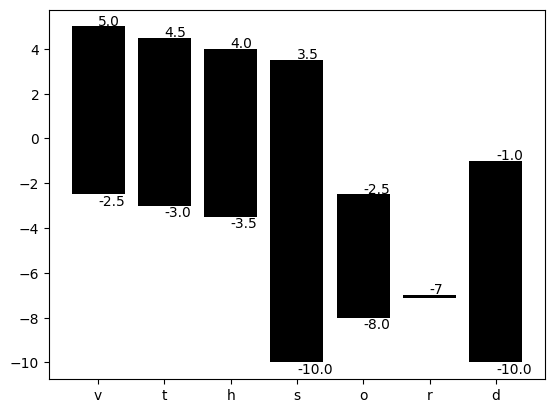

In [2]:
outputStageTiming()

{'v': [1.0, -1.5], 't': [0.5, -2.0], 'h': [0.0, -3.5], 's': [-0.5, -10.0], 'o': [-4.0, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}


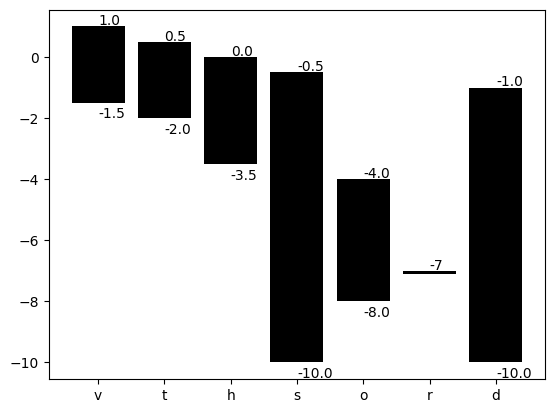

In [15]:
outputStageTiming('/home/oem/datosFits/Data_2023/MicrochipTest_Marzo/datos/vFiles/voltage_skp_lta_v83_microchip.sh')

{'v': [1.5, -1.0], 't': [1.0, -1.5], 'h': [0.5, -3.0], 's': [0.0, -10.0], 'o': [-3.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}


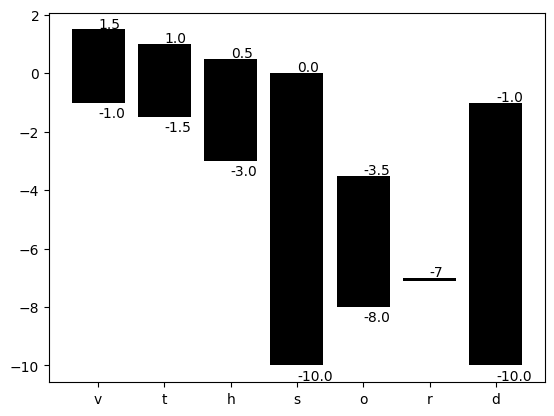

In [14]:
outputStageTiming('/home/oem/datosFits/Data_2023/MicrochipTest_Marzo/datos/vFiles/voltage_skp_lta_v82_microchip.sh')

{'v': [2.0, -0.5], 't': [1.5, -1.0], 'h': [1.0, -2.5], 's': [0.5, -10.0], 'o': [-3.0, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}


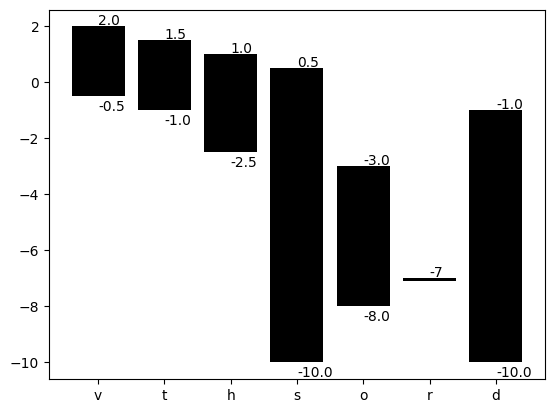

In [11]:
outputStageTiming('/home/oem/datosFits/Data_2023/MicrochipTest_Marzo/datos/vFiles/voltage_skp_lta_v81_microchip.sh')

{'v': [5.0, -1.0], 't': [4.5, -1.5], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 1.5], 't': [4.5, -1.5], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 2.5], 't': [4.5, 0.0], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 2.5], 't': [4.5, 0.5], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [2.5, 0.0], 't': [2.0, -0.5], 'h': [1.5, -2.0], 's': [1.0, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 3.5], 't': [4.5, 3.0], 'h': [4.0, 2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [0.0, -2.5], 't': [-0.5, -3.0], 'h': [-1.0, -4.5], 's': [-1.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 3.5], 't': [4.5, 2.5], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': 

/tmp/ipykernel_53865/1212596202.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


{'v': [5.0, 3.5], 't': [4.5, 3.0], 'h': [4.0, 0.5], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 3.5], 't': [4.5, 2.5], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, -0.5], 't': [4.5, -1.5], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 3.5], 't': [4.5, 3.0], 'h': [4.0, 1.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [0.5, -2.0], 't': [0.0, -2.5], 'h': [-0.5, -4.0], 's': [-1.0, -10.0], 'o': [-4.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, -1.0], 't': [4.5, -1.5], 'h': [4.0, -3.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [5.0, 3.5], 't': [4.5, 3.0], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}
{'v': [4.5, 2.0], 't': [4.0, 1.5], 'h': [3.5, 0.0], 's': [3.0, -10.0], 'o': [-2.5, -8.0], 'r': [-7

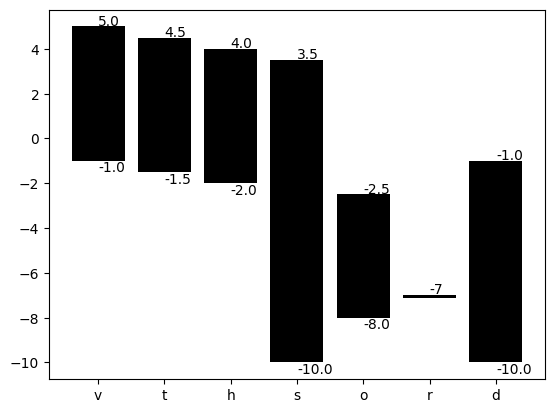

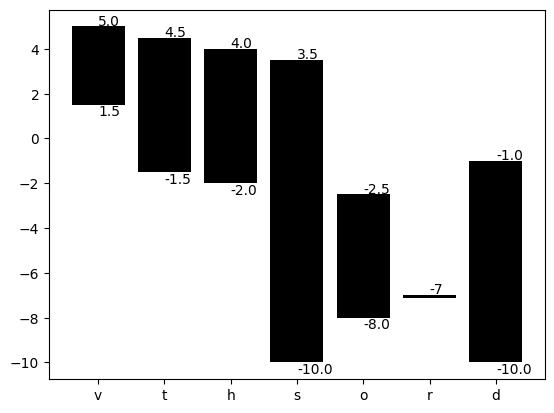

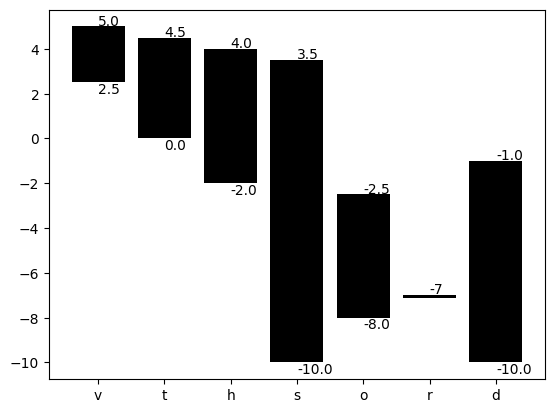

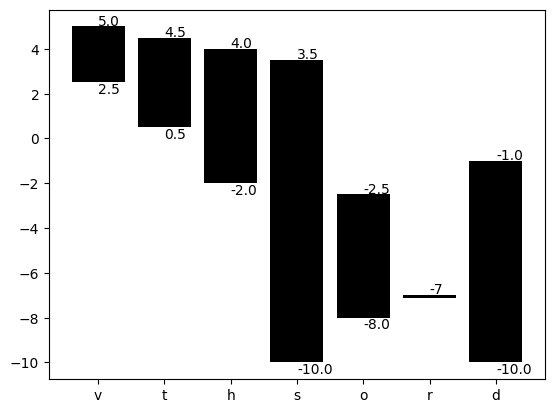

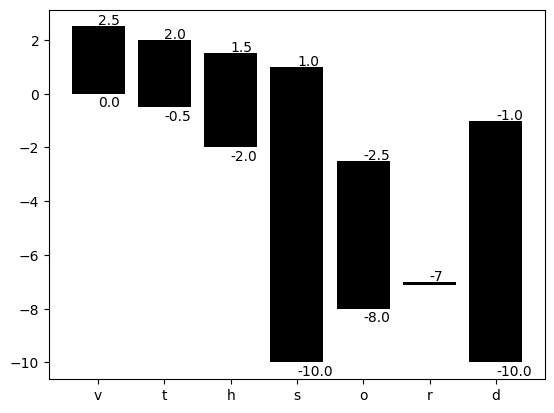

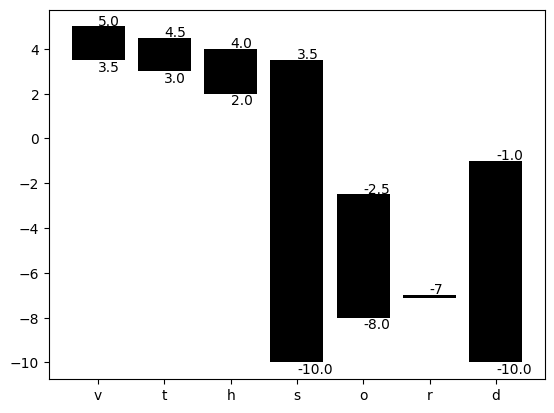

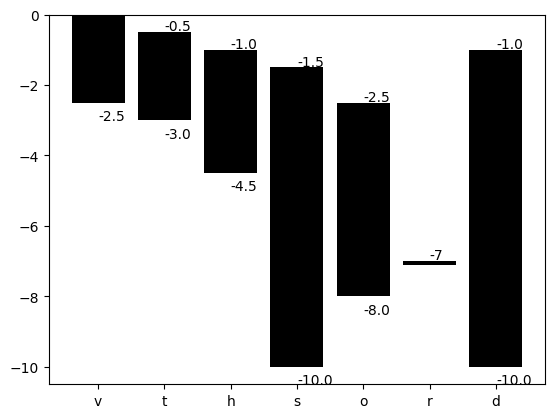

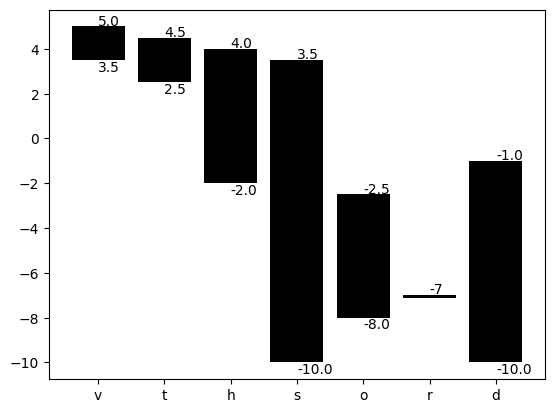

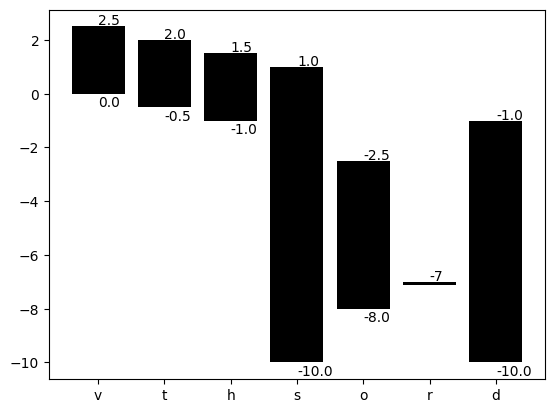

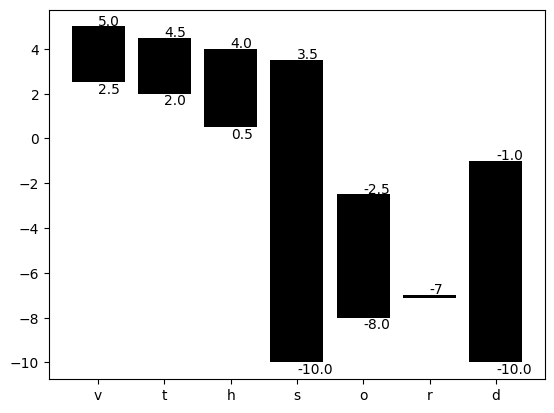

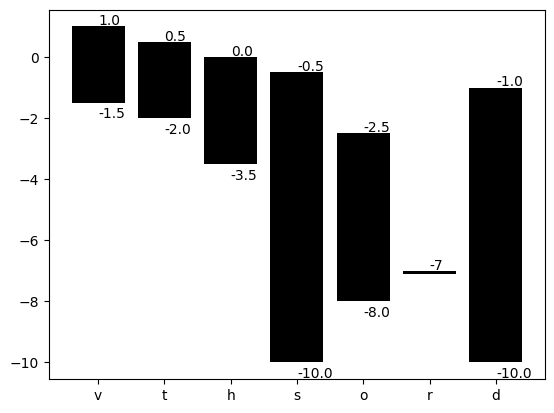

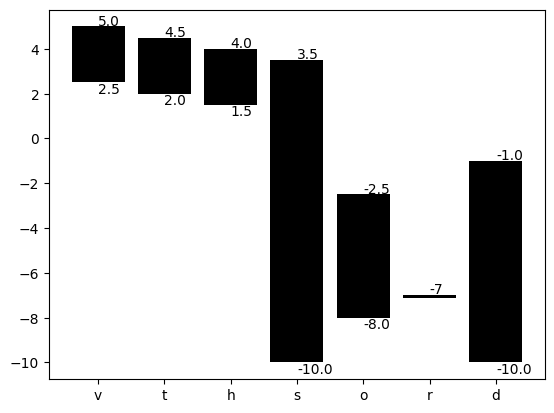

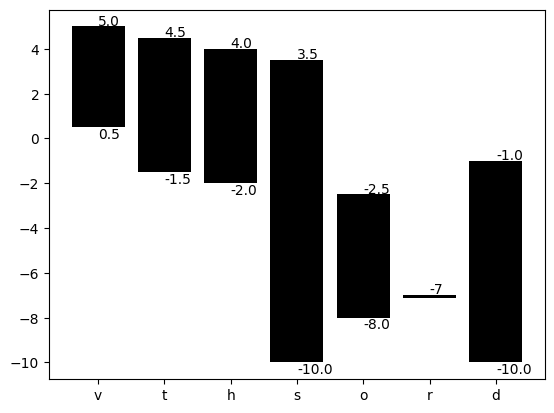

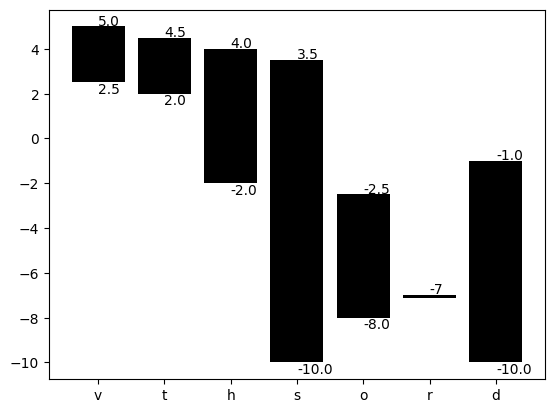

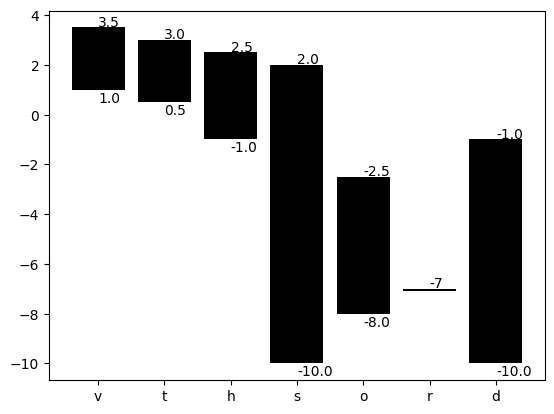

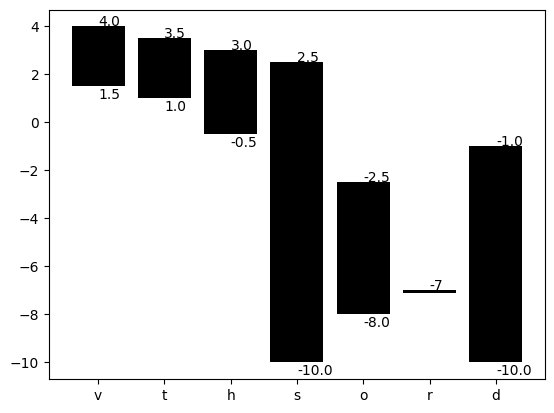

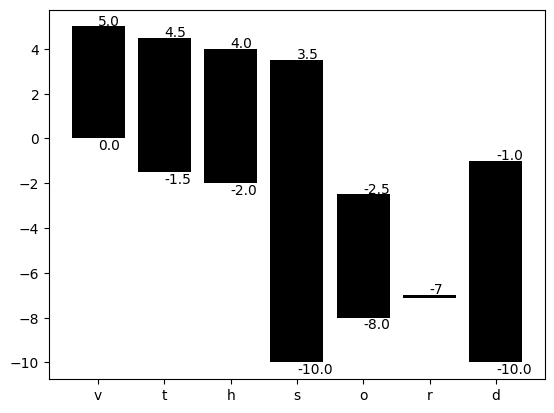

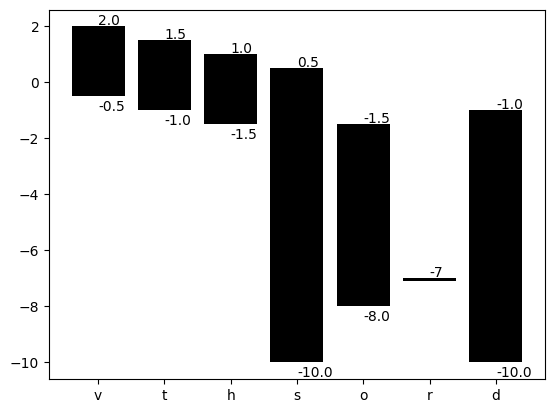

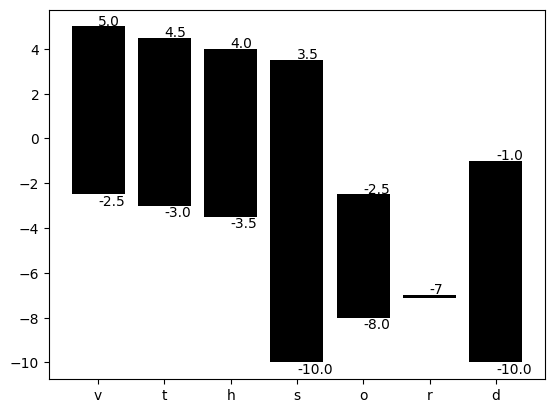

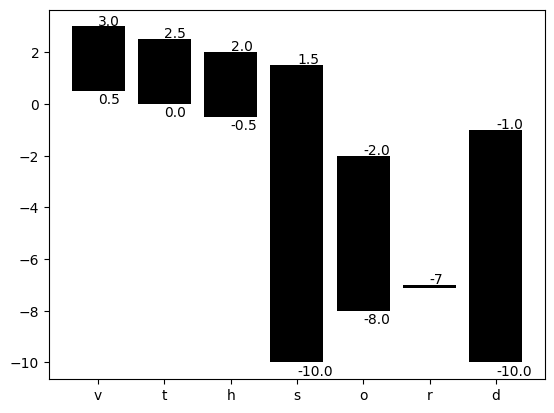

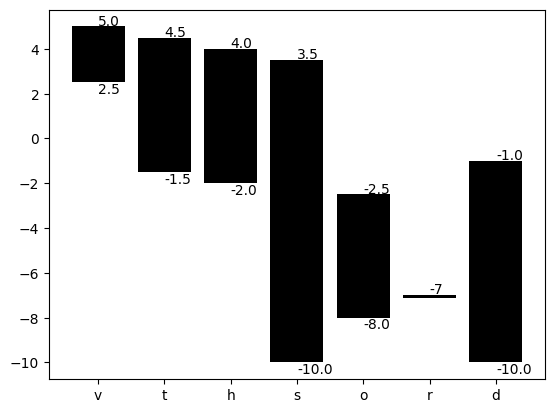

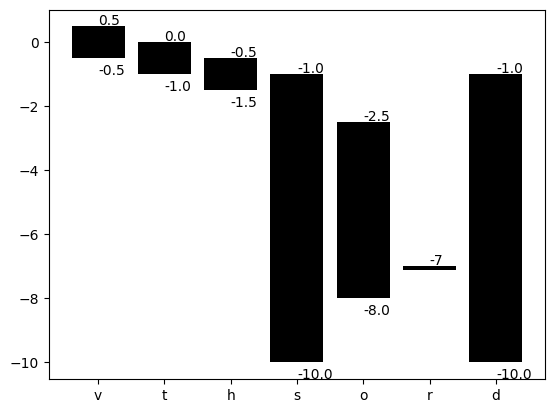

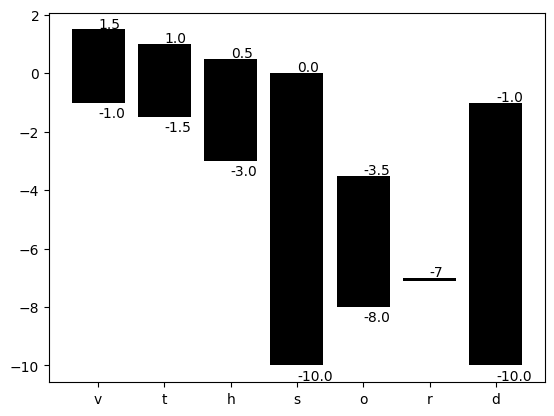

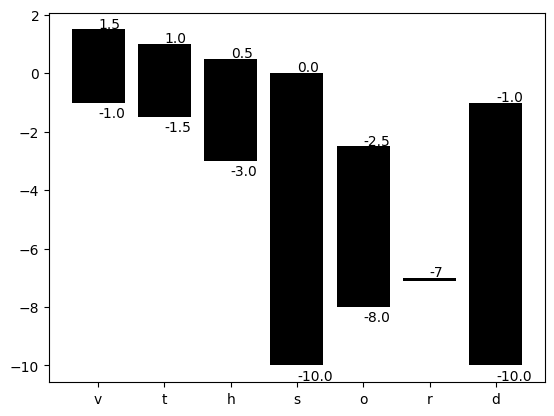

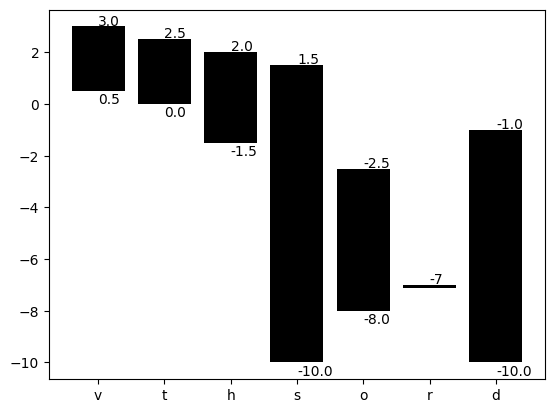

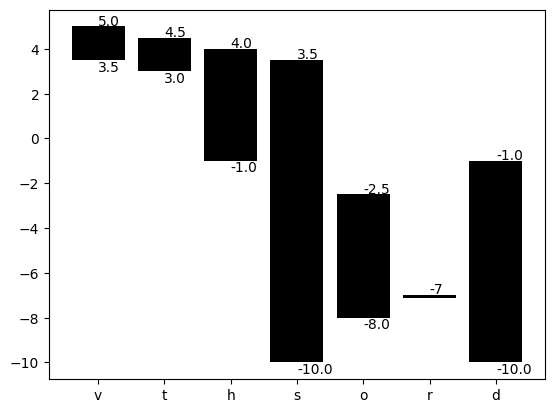

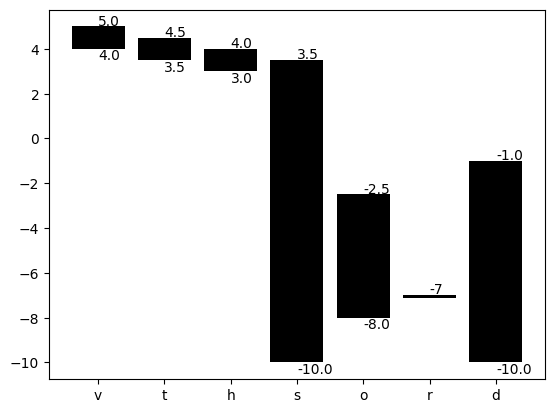

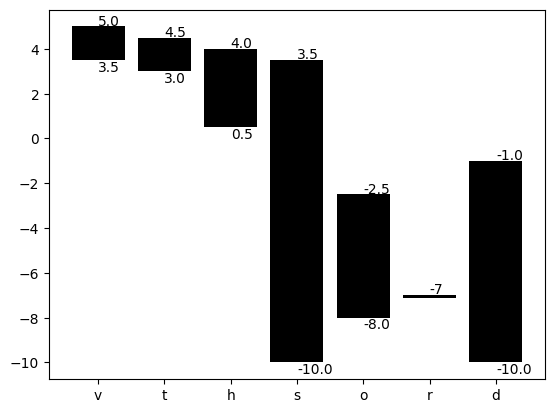

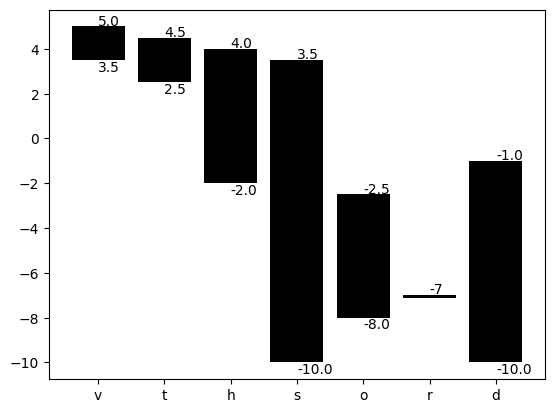

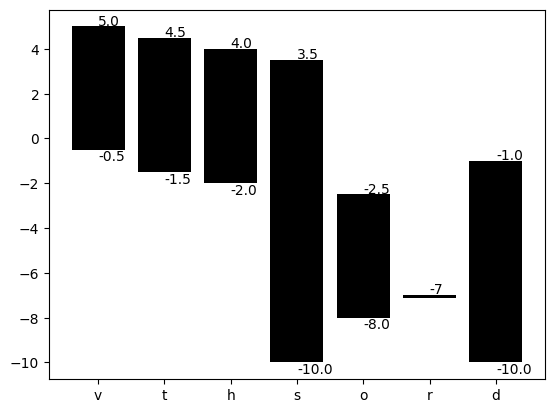

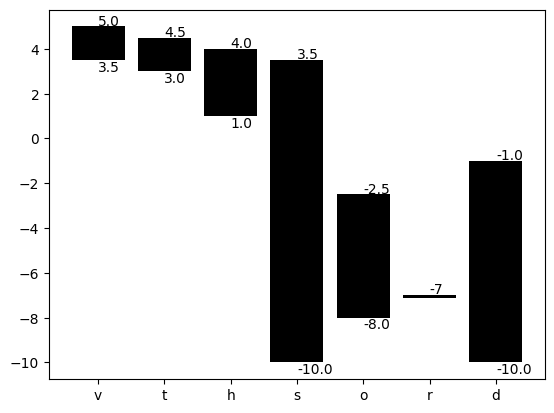

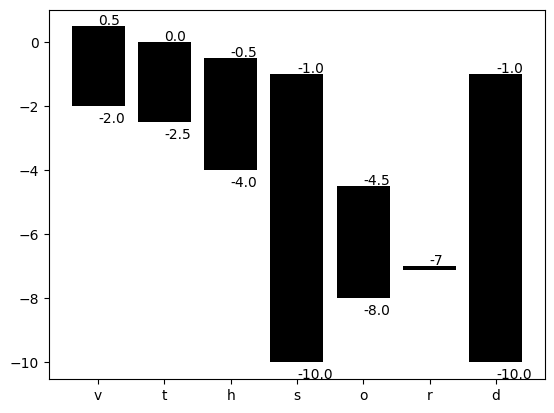

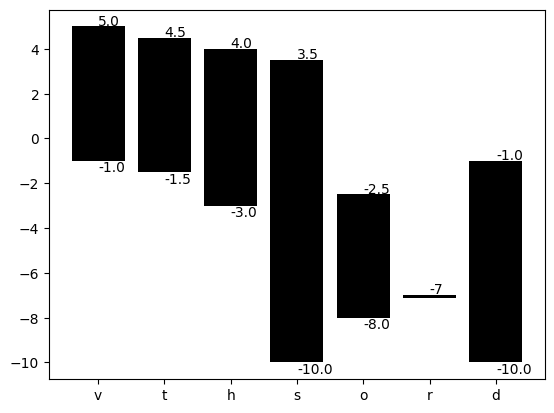

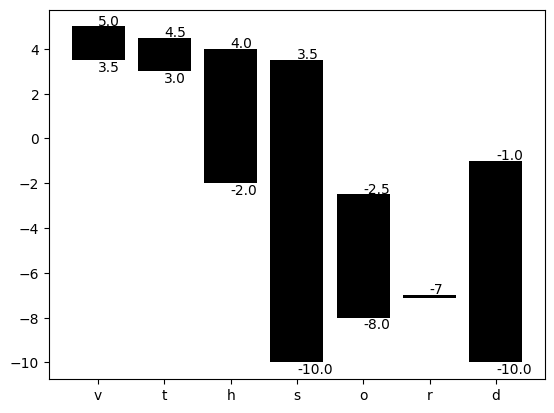

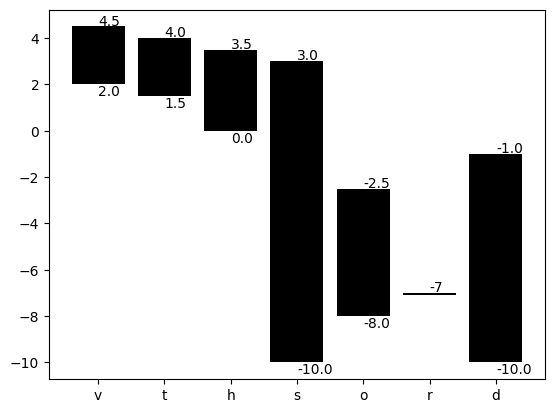

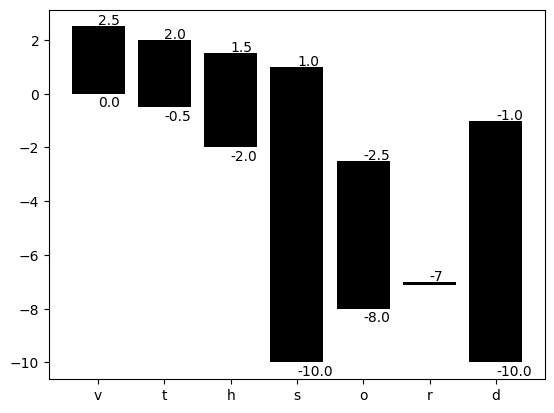

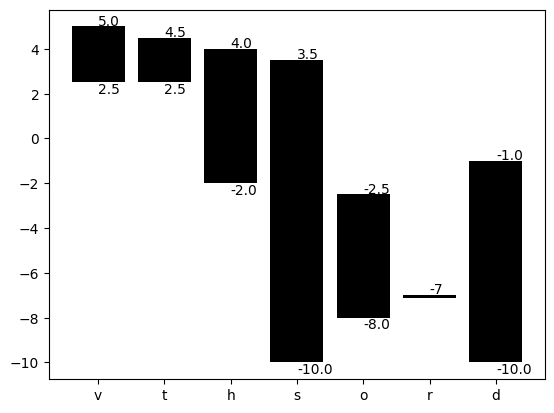

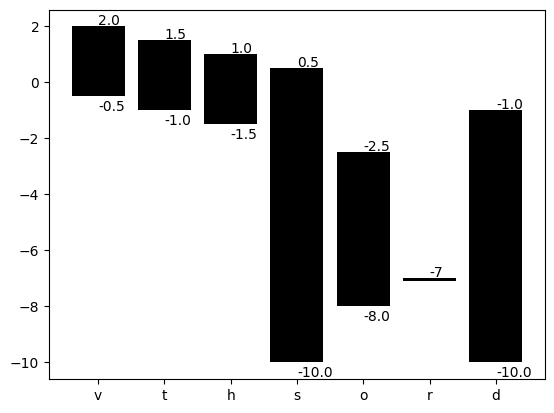

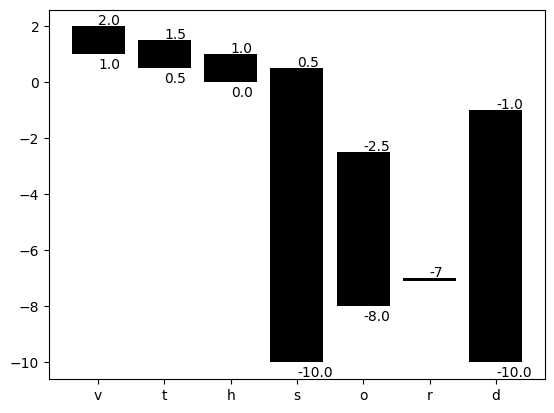

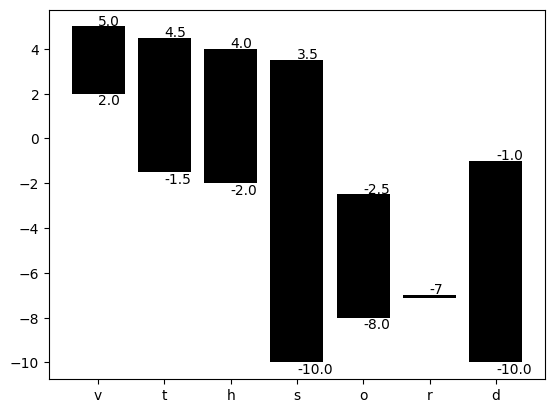

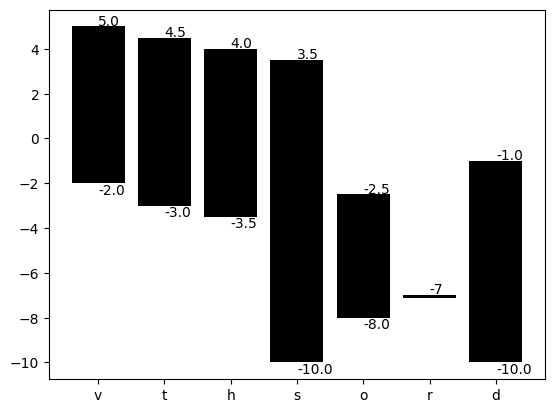

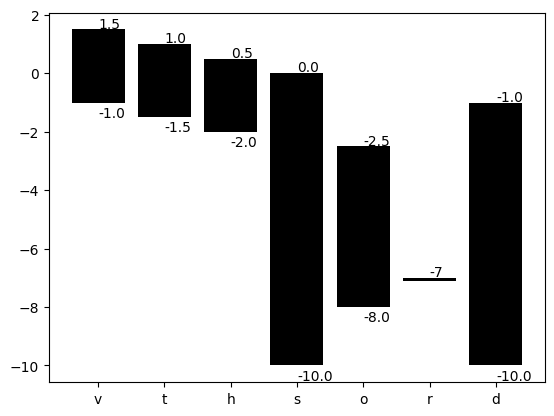

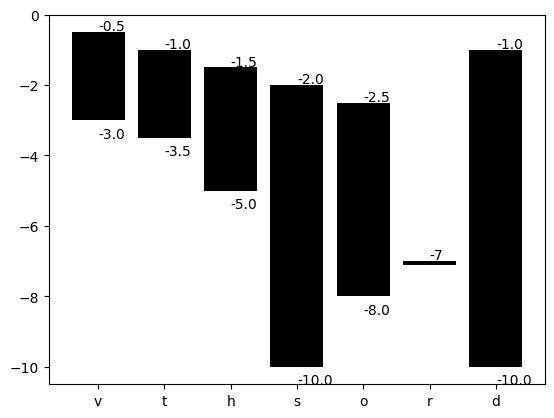

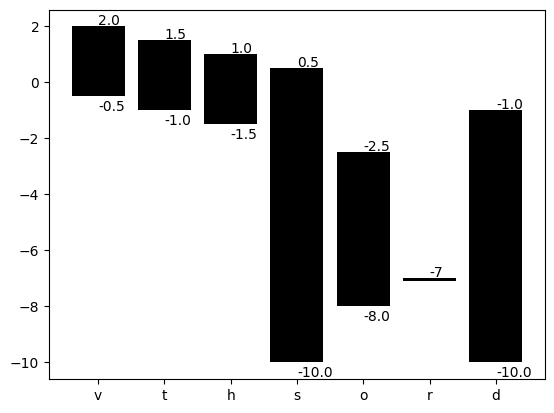

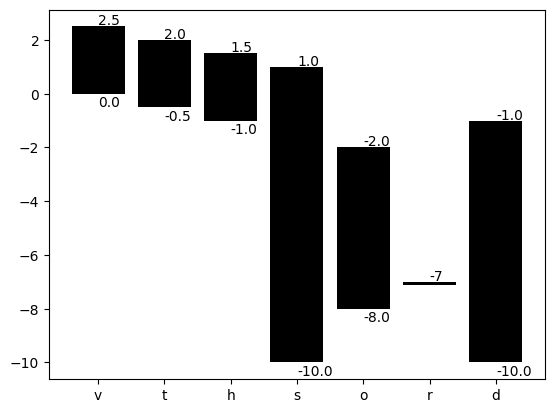

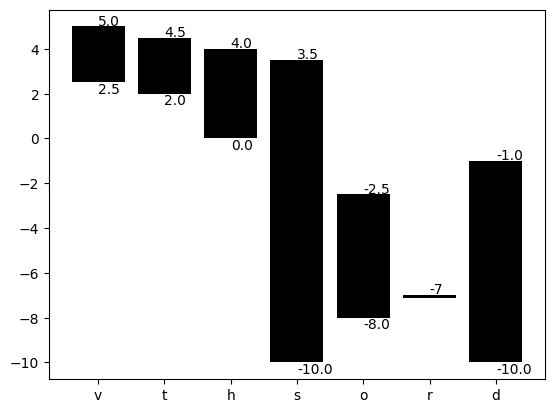

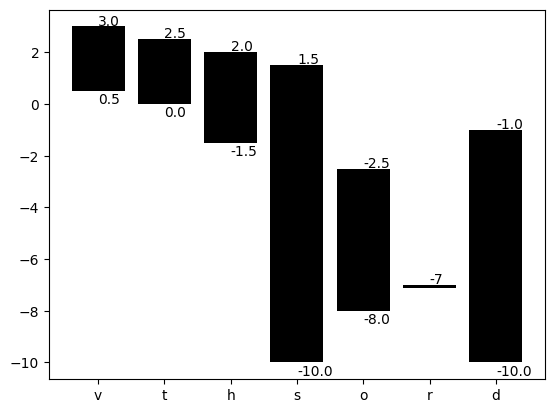

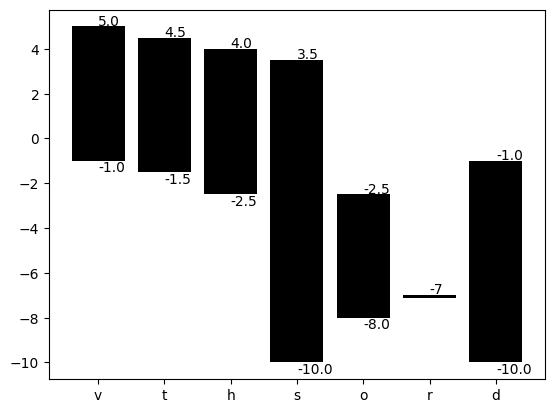

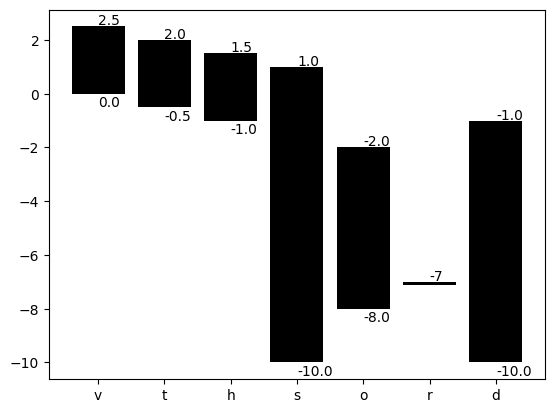

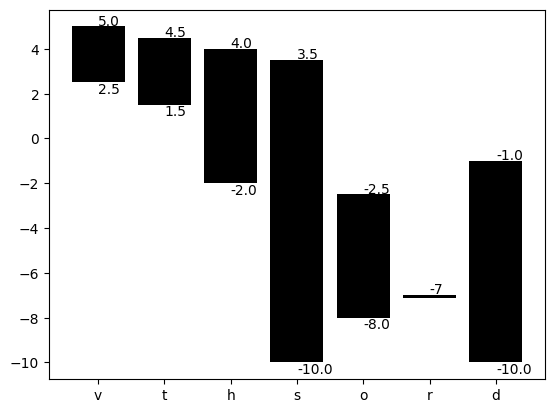

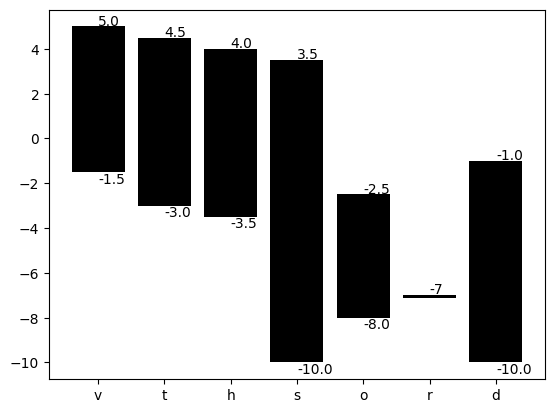

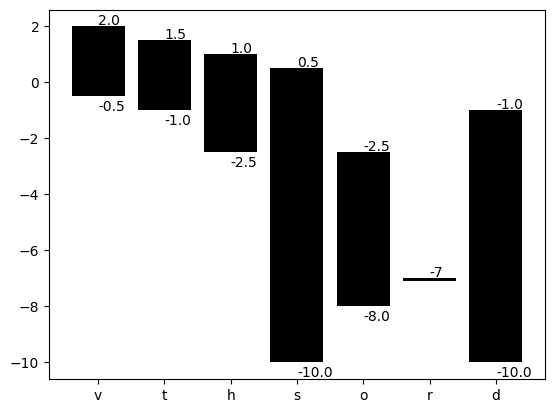

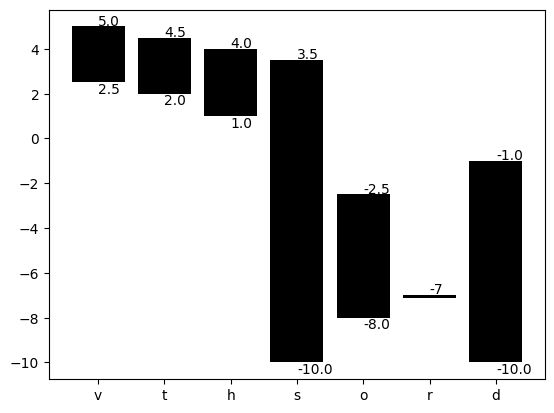

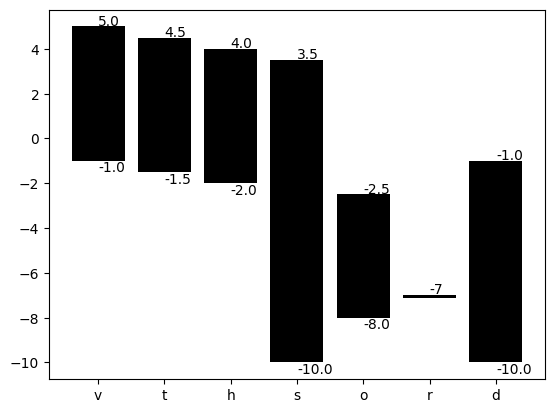

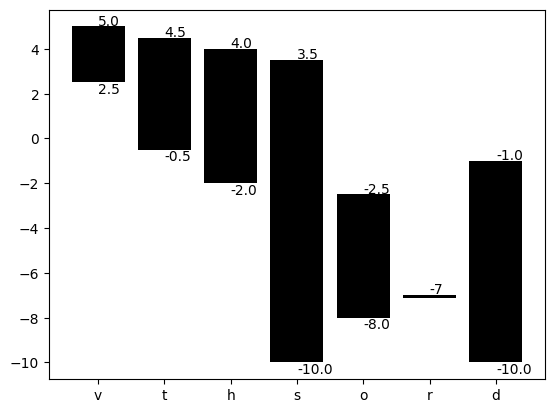

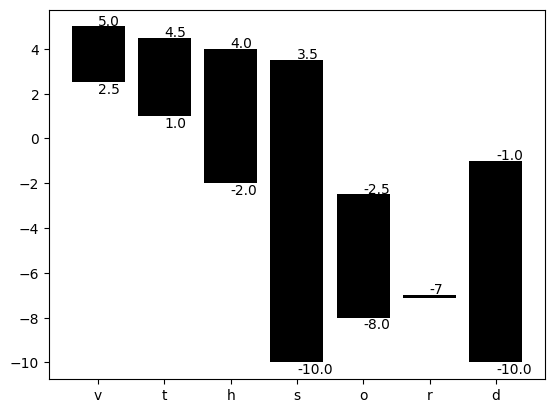

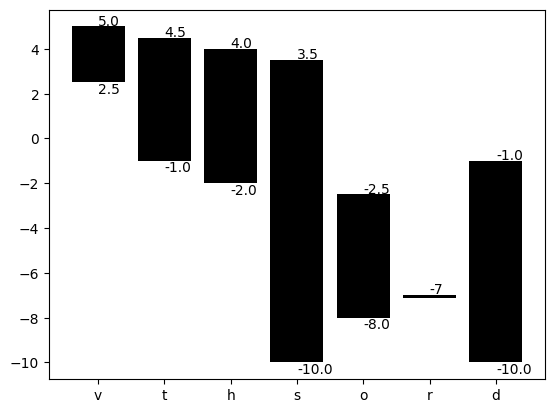

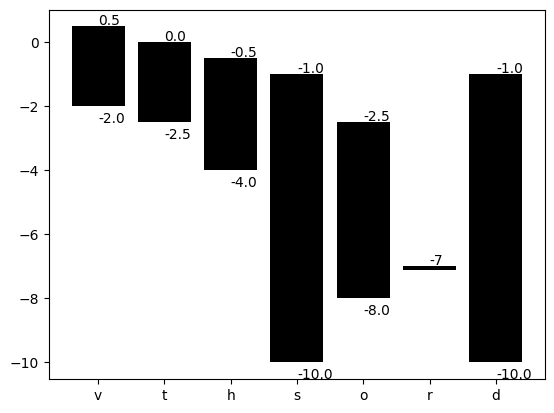

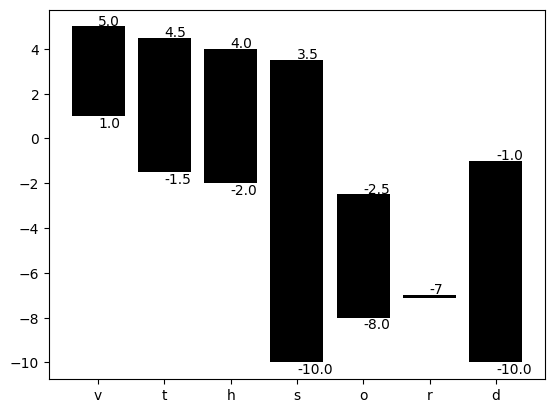

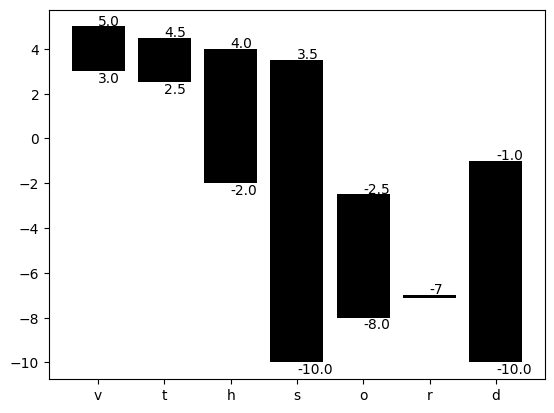

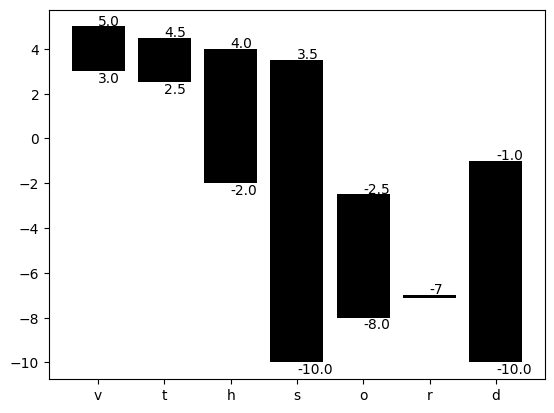

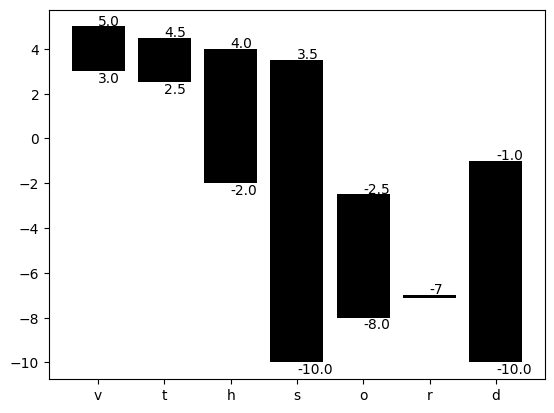

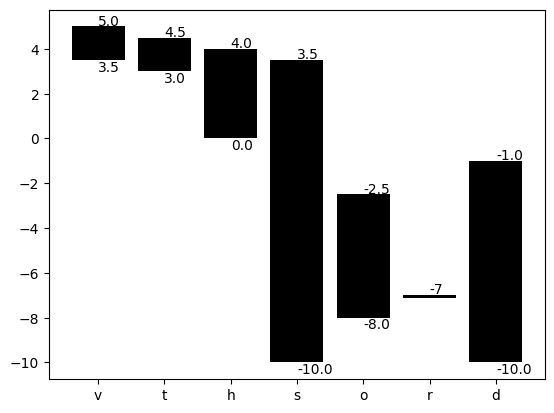

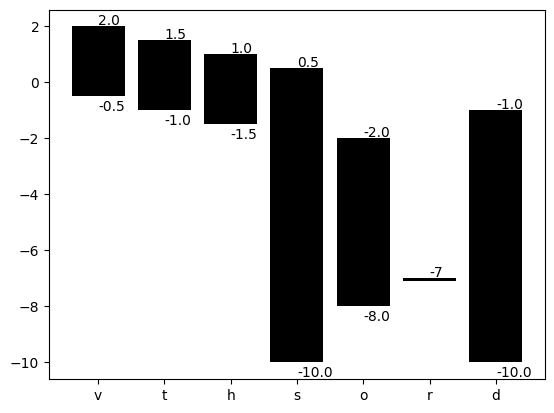

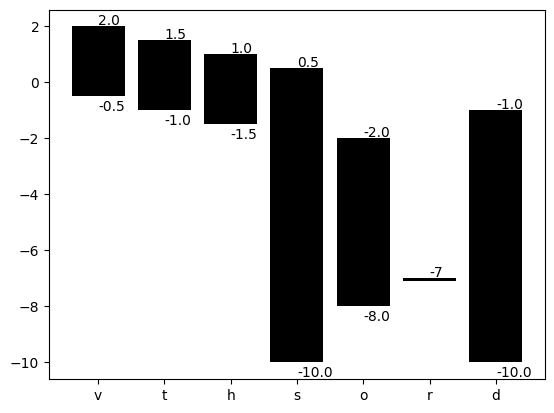

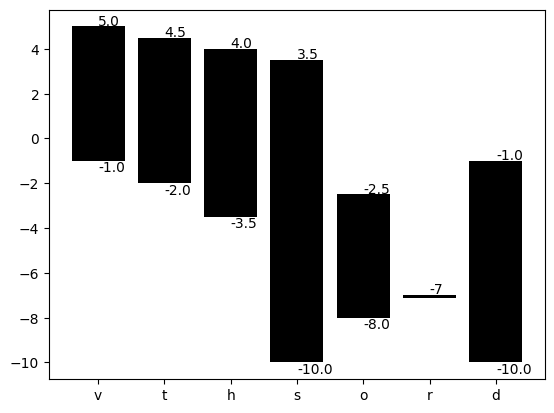

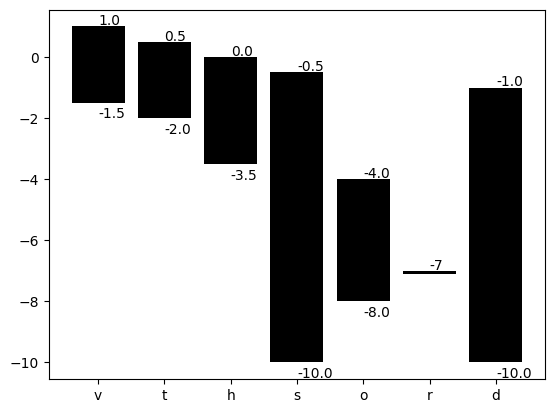

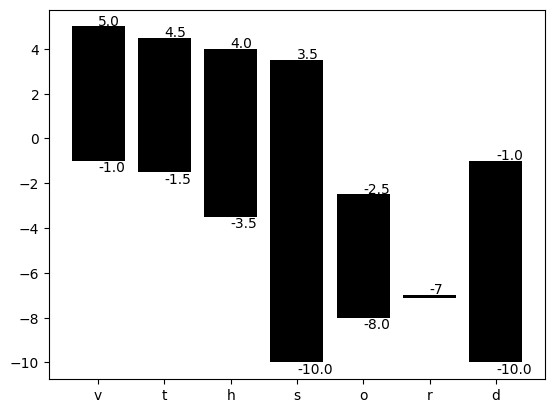

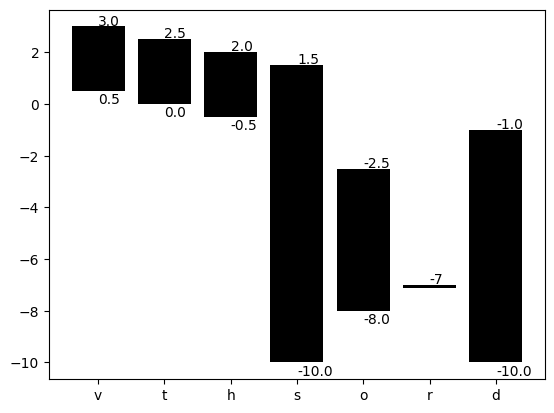

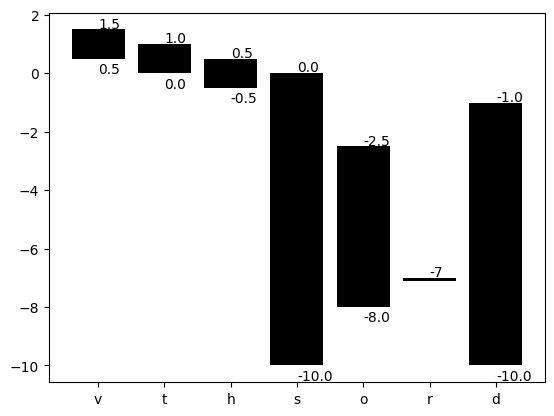

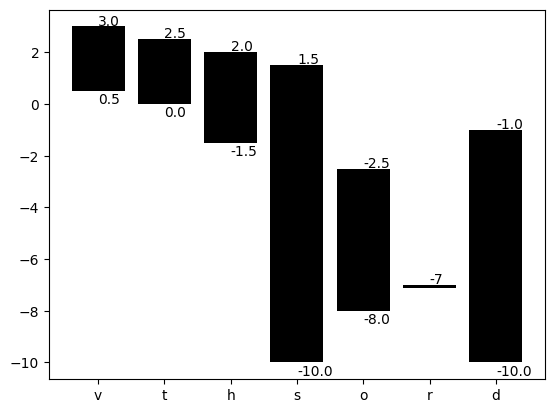

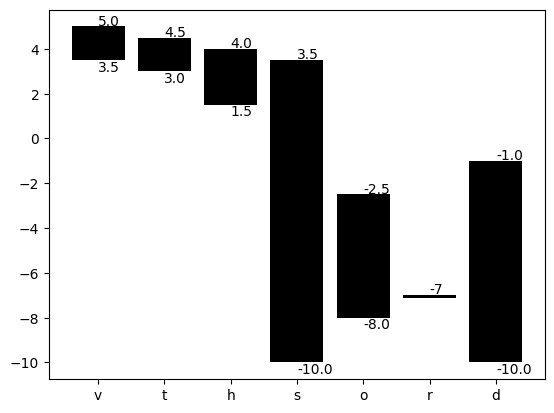

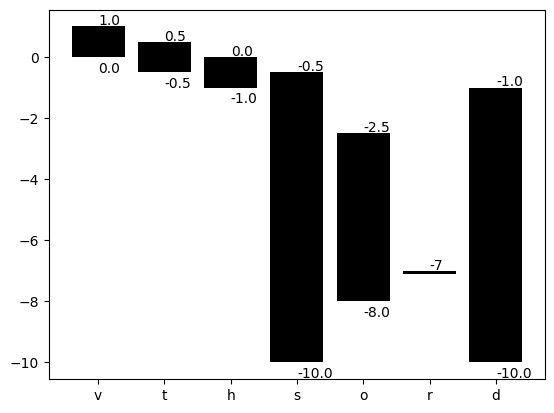

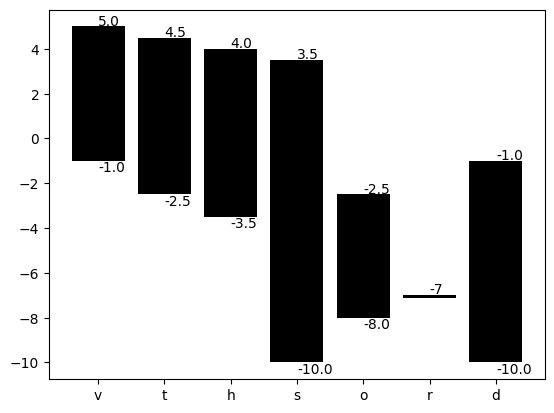

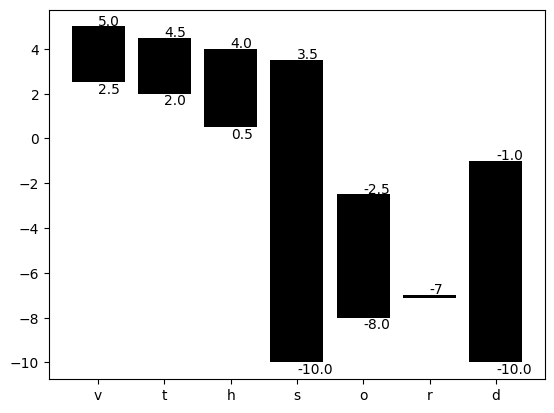

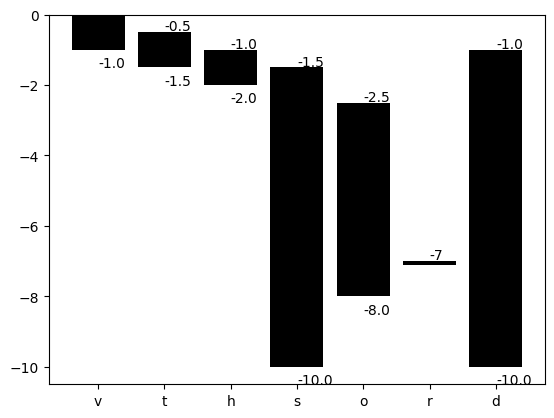

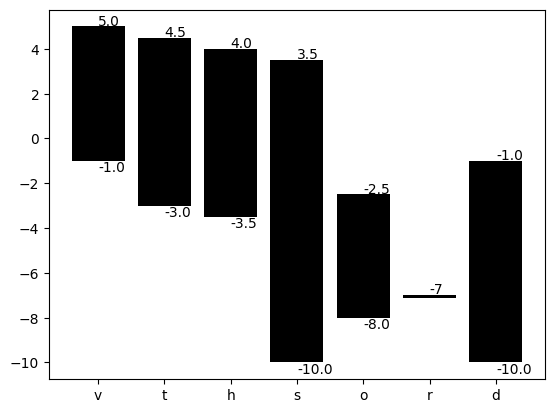

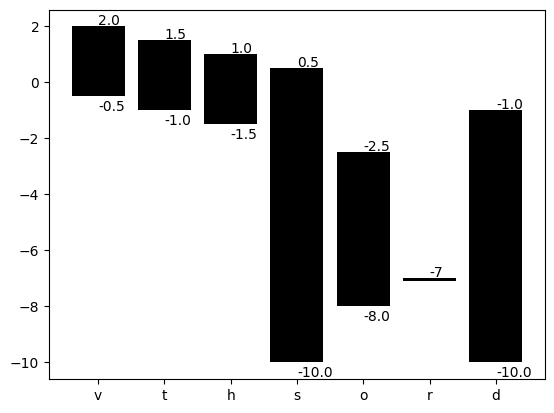

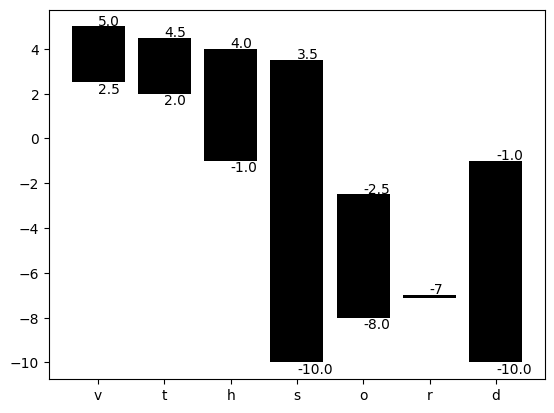

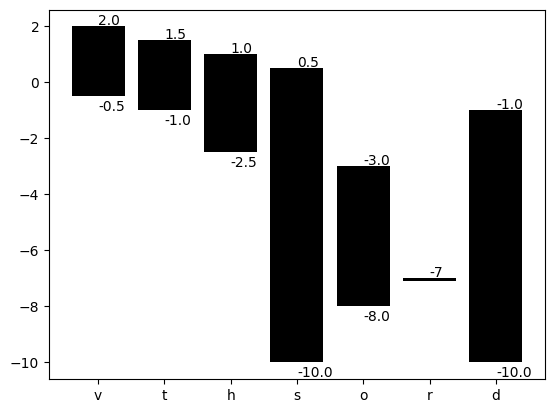

In [5]:
dir='/home/oem/datosFits/Data_2023/MicrochipTest_Marzo/datos/vFiles/'
listDir=os.listdir(dir)

for image in listDir:
    if image.endswith('.sh'):
        outputStageTiming(dir+image, saveFig=False)


In [6]:
dir='/home/oem/datosFits/Data_2023/MicrochipTest_Marzo/datos/vFiles/'
listDir=os.listdir(dir)


def animation_fun(interval):
    outputStageTiming(dir+listDir[interval], saveFig=False)




In [7]:
len(listDir)

80

{'v': [5.0, -1.0], 't': [4.5, -1.5], 'h': [4.0, -2.0], 's': [3.5, -10.0], 'o': [-2.5, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}


<Figure size 700x500 with 0 Axes>

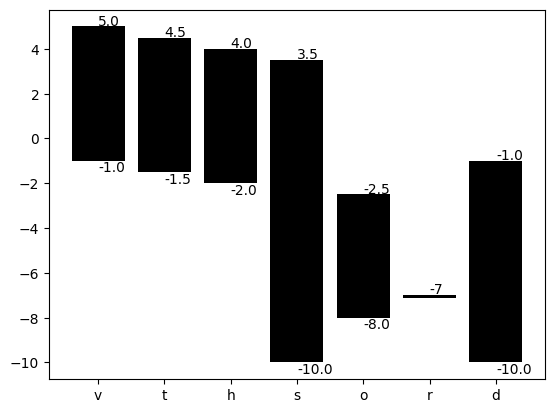

In [8]:
fig = plt.figure(figsize = (7,5))
animation=FuncAnimation(fig,animation_fun,interval=80)


# plot data
busqueda de electronePeaks

In [9]:
from plotdata_sub_electronPeak import plotData as pt
file='/home/maumtz/datosFits/testMITLL/14NOV22/proc_skp_module26_MITLL01_externalVr_Vtest_T170_testLeakage__NSAMP324_NROW50_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img13.fits'
pt(file)

ModuleNotFoundError: No module named 'plotdata_sub_electronPeak'

# Propuesta
#### -leer el header del archivo fits y extraer directamente de la imagen los parametros de los relojes.
#### -iterar sobre una lista de arhivos y generar la imagen correspondiente a cada uno de ellos
#### -Salvar cada imagen con el nombre correspondiente a la imagen que esta analizando